# Hand Signs Dataset

## Inroduction

The following dataset shows the MNIST Signs Dataset with labels and pixel values in a single row.
The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).
<img src='american_sign_language.png'>

## Data Overview

The dataset format matches closely with the classic MNIST dataset.Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2....pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds. 
<img src='sign.png'>

## Importing the libraries

### numpy
NumPy is the fundamental package for scientific computing with Python. It contains among other things:

 - a powerful N-dimensional array object
 - sophisticated (broadcasting) functions

### pandas
pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python.

### matplotlib
Matplotlib is a plotting library in Python, which produces 2D graphics in different interactive environments. In Matplotlib, you can draw different types of graphs, like line, scattered, bar, etc.

### seaborn
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix , accuracy_score

## Loading The Data

In [2]:
df=pd.read_csv('sign_mnist_train.csv')

In [3]:
df.shape

(27455, 785)

In [4]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [28]:
# Slice the dataset. Save the first column as y(Target) and rest of the columns as X(Features).
x=df.loc[:,df.columns!='label']
y=df['label']

In [7]:
print(x.shape)
print(y.shape)
print(type(x))

(27455, 784)
(27455,)
<class 'pandas.core.frame.DataFrame'>


In [8]:
x2=x.values
print(type(x2))

<class 'numpy.ndarray'>


In [9]:
y2=y.values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [12]:
train_y.shape

(27455,)

In [13]:
df.label.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

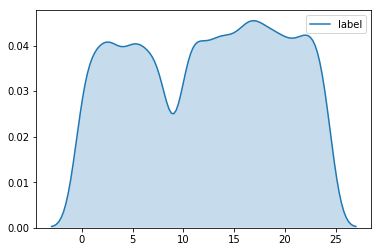

In [14]:
sns.kdeplot(y,shade=True)

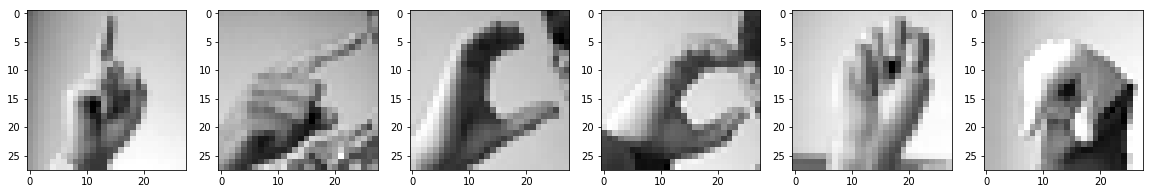

In [15]:
plt.figure(figsize = (20,4))
for index , (image,label) in enumerate(zip(x2[0:6] , y2[0:6])):
  plt.subplot(1,6,index+1)
  plt.imshow(np.reshape(image , (28,28)) , cmap = plt.cm.gray)

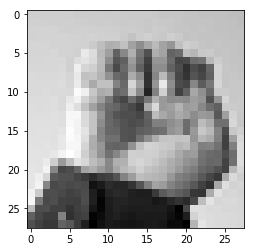

In [16]:
imag=x2[27427]
imag.shape=(28,28)
plt.subplot(1,1,1)
plt.imshow(imag,cmap=plt.cm.gray)

## Train-Test Split

## x_train :
    The dataset over which the model will be trained upon. Our classifier models will be trained on this data.

## y_train :
    This is the labelled dataset corresponding to the x_train, this contains the target labels corresponding to the Images of the dataset.

## x_test :
    This is the dataset kept aside to test the Machine Learning model trained upon the Dataset x_train, so that out model will have unseen data to predict and test upon.

## y_test :
    This is the labelled dataset corresponding to the x_train, this contains the target labels corresponding to the Images of the dataset.

In [17]:
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split(x2 , y2 , test_size = 0.3 , random_state =0)

## Dimensionality Reduction

Dimensionality Reduction is the technique of representing multi-dimensional(data with multiple features having a correlation with each other) data in 2 or 3 dimensions. Having too many features in the training set can make the process extremely slow and is not able to give a good solution.

## PCA (Principal Component Analysis)
PCA is a dimensionality reduction technique that can be used for data compression to speed up learning algorithms as well as for visualizations of complex datasets.

In [18]:
from sklearn import decomposition
pca = decomposition.PCA()

In [19]:
pca.n_components = 2
pca_data = pca.fit_transform(x)

print("Reduced PCA shape = ", pca_data.shape)

Reduced PCA shape =  (27455, 2)


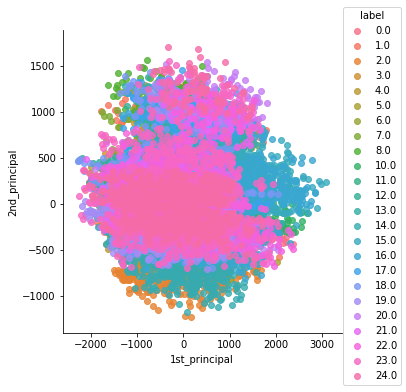

In [20]:
# attaching the label for each 2-d data point 
pca_dat = np.vstack((pca_data.T, y)).T


pca_df = pd.DataFrame(data=pca_dat, columns=("1st_principal", "2nd_principal", "label"))
sns.lmplot('1st_principal', '2nd_principal', data=pca_df, hue='label', fit_reg=False)
plt.show()

### Observation:
PCA is a good choice for dimensionality reduction and visualisation for datasets when we have large number of features but it will not be able to interpret complex polynomial relationship bewteen features.

### Comparing the images before and after applying the PCA¶


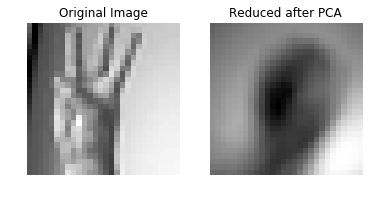

In [22]:
import matplotlib
imag = x2[7]
imag.shape = (28,28)


a = plt.subplot(1,2,1)
a.set_title('Original Image')
plt.imshow(imag,cmap=plt.cm.gray)
plt.axis("off")

imag = pca.inverse_transform(pca_data[7])
imag.shape = (28,28)

b = plt.subplot(1,2,2)
b.set_title("Reduced after PCA")
plt.imshow(imag,cmap=plt.cm.gray)
plt.axis("off")
plt.show()


In [ ]:
from sklearn import manifold
tsne=manifold.TSNE(n_components=2,init='pca',random_state=0)
TSNE=tsne.fit_transform(x)
print(TSNE.shape)

# Data Modelling

## Logistic Regression
Logistic Regression is a method for classifying data into discrete outcomes.

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_x , train_y)
pred_y = model.predict(test_x)

In [24]:
d = {'Actual' : test_y , 'Predicted' : pred_y}
out = pd.DataFrame(data = d)
print(out)

      Actual  Predicted
0         15         15
1          0          0
2         15         15
3          6          6
4          0          0
5         15         15
6          8          8
7         17         17
8         23         23
9          4          4
10        19         19
11         6          6
12         2          2
13         1          1
14        22         22
15        10         10
16        19         19
17        15         15
18        21         21
19         6          6
20        15         15
21        12         12
22        16         16
23         6          6
24        14         14
25        16         16
26        14         14
27        10         10
28        11         11
29        17         17
...      ...        ...
8207      19         19
8208      15         15
8209      19         19
8210      18         18
8211       6          6
8212      17         17
8213      13         13
8214      23         23
8215       2          2
8216      19    

In [25]:
print(accuracy_score(test_y ,pred_y))

1.0


[[154   0   0   0  36   0   0   0  20  17   0  15   5  16  29  12   0  34
    0   0   0   0   2   0]
 [  0 141   0   0  18  12   0   0  32  34   0   0   1   0  32   2  15   8
    0   4   0   5   0   0]
 [  0   0 264   0   1   3   8   0   0   3   2   0   0  25   7   9   0   0
   15   0   0   0   0   0]
 [  0   6   0 162  16  10   0   0  42  41   0   0   1   0  20  11  27  14
    9   5  10   1   6   4]
 [ 15   0   0   0 186   0   0   0   3   1   0  22   4   8   7  17   0  19
    3   4   0   1   5   0]
 [  1   2   3   2   5 128  16   0  10  18  10   0   0  23  26  15  19   1
   56   0  11   3   8   0]
 [  0   0   3   2   0  18 168  20   6   3  17   0   0   2   8  12   6   0
   63   1   0   0   2   0]
 [  0   0   0  10   0   4  52 115   1  22   1   0   0   2  11  11   0   0
   58   2   8   1   0   6]
 [ 10   0   0   4   0  11   4   0 206  14   0   4   1   4  11   3  12   8
    7   1   9  10   5   3]
 [  0   3   0   0   0   0   0   0   8 156   2   0   0   0  26   1  60   0
    4   4  31   5

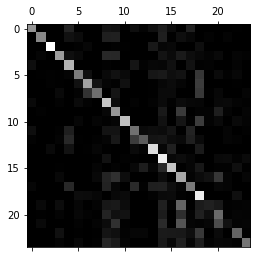

In [38]:
print(confusion_matrix(test_y ,pred_y))
plt.matshow(confusion_matrix(test_y ,pred_y) , cmap = plt.cm.gray, )
plt.show()

## Naive Baye's

### Gaussian Naive Baye's

In [27]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(train_x , train_y)
pred_y = model1.predict(test_x)

In [28]:
d = {'Actual' : test_y , 'Predicted' : pred_y}
out = pd.DataFrame(data = d)
print(out)

      Actual  Predicted
0         15         15
1          0          4
2         15         22
3          6          6
4          0          0
5         15         15
6          8          8
7         17         17
8         23         23
9          4          4
10        19         19
11         6         19
12         2         14
13         1          5
14        22         21
15        10         10
16        19         19
17        15         15
18        21         17
19         6         19
20        15         15
21        12         12
22        16         16
23         6          5
24        14         14
25        16          7
26        14         14
27        10         17
28        11         11
29        17         17
...      ...        ...
8207      19         19
8208      15         15
8209      19         19
8210      18         15
8211       6         15
8212      17         17
8213      13         13
8214      23         23
8215       2         14
8216      19    

In [29]:
print("Confusion Matrix")
print(confusion_matrix(test_y , pred_y))

Confusion Matrix
[[154   0   0   0  36   0   0   0  20  17   0  15   5  16  29  12   0  34
    0   0   0   0   2   0]
 [  0 141   0   0  18  12   0   0  32  34   0   0   1   0  32   2  15   8
    0   4   0   5   0   0]
 [  0   0 264   0   1   3   8   0   0   3   2   0   0  25   7   9   0   0
   15   0   0   0   0   0]
 [  0   6   0 162  16  10   0   0  42  41   0   0   1   0  20  11  27  14
    9   5  10   1   6   4]
 [ 15   0   0   0 186   0   0   0   3   1   0  22   4   8   7  17   0  19
    3   4   0   1   5   0]
 [  1   2   3   2   5 128  16   0  10  18  10   0   0  23  26  15  19   1
   56   0  11   3   8   0]
 [  0   0   3   2   0  18 168  20   6   3  17   0   0   2   8  12   6   0
   63   1   0   0   2   0]
 [  0   0   0  10   0   4  52 115   1  22   1   0   0   2  11  11   0   0
   58   2   8   1   0   6]
 [ 10   0   0   4   0  11   4   0 206  14   0   4   1   4  11   3  12   8
    7   1   9  10   5   3]
 [  0   3   0   0   0   0   0   0   8 156   2   0   0   0  26   1  60   0


In [30]:
print(accuracy_score(test_y ,pred_y))

0.4490712638096394


### Multinomial Naive Baye's

In [31]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB()
model1.fit(train_x , train_y)
pred_y = model1.predict(test_x)

In [32]:
d = {'Actual' : test_y , 'Predicted' : pred_y}
out = pd.DataFrame(data = d)
print(out)

      Actual  Predicted
0         15         15
1          0          4
2         15         22
3          6          6
4          0          0
5         15         15
6          8          8
7         17         17
8         23         23
9          4          4
10        19         19
11         6         19
12         2         14
13         1          5
14        22         21
15        10         10
16        19         19
17        15         15
18        21         17
19         6         19
20        15         15
21        12         12
22        16         16
23         6          5
24        14         14
25        16          7
26        14         14
27        10         17
28        11         11
29        17         17
...      ...        ...
8207      19         19
8208      15         15
8209      19         19
8210      18         15
8211       6         15
8212      17         17
8213      13         13
8214      23         23
8215       2         14
8216      19    

In [33]:
print("Confusion Matrix")
print(confusion_matrix(test_y , pred_y))

Confusion Matrix
[[154   0   0   0  36   0   0   0  20  17   0  15   5  16  29  12   0  34
    0   0   0   0   2   0]
 [  0 141   0   0  18  12   0   0  32  34   0   0   1   0  32   2  15   8
    0   4   0   5   0   0]
 [  0   0 264   0   1   3   8   0   0   3   2   0   0  25   7   9   0   0
   15   0   0   0   0   0]
 [  0   6   0 162  16  10   0   0  42  41   0   0   1   0  20  11  27  14
    9   5  10   1   6   4]
 [ 15   0   0   0 186   0   0   0   3   1   0  22   4   8   7  17   0  19
    3   4   0   1   5   0]
 [  1   2   3   2   5 128  16   0  10  18  10   0   0  23  26  15  19   1
   56   0  11   3   8   0]
 [  0   0   3   2   0  18 168  20   6   3  17   0   0   2   8  12   6   0
   63   1   0   0   2   0]
 [  0   0   0  10   0   4  52 115   1  22   1   0   0   2  11  11   0   0
   58   2   8   1   0   6]
 [ 10   0   0   4   0  11   4   0 206  14   0   4   1   4  11   3  12   8
    7   1   9  10   5   3]
 [  0   3   0   0   0   0   0   0   8 156   2   0   0   0  26   1  60   0


In [34]:
print(accuracy_score(test_y ,pred_y))

0.4490712638096394


## SVM (Support Vector Machines)

### Linear Kernel

In [30]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear')
model.fit(train_x , train_y)
y_pred = model.predict(test_x)
d = {'Actual' : test_y , 'Predicted' : y_pred}
out = pd.DataFrame(data = d)
print(out)

      Actual  Predicted
0         15         15
1          0          0
2         15         15
3          6          6
4          0          0
5         15         15
6          8          8
7         17         17
8         23         23
9          4          4
10        19         19
11         6          6
12         2          2
13         1          1
14        22         22
15        10         10
16        19         19
17        15         15
18        21         21
19         6          6
20        15         15
21        12         12
22        16         16
23         6          6
24        14         14
25        16         16
26        14         14
27        10         10
28        11         11
29        17         17
...      ...        ...
8207      19         19
8208      15         15
8209      19         19
8210      18         18
8211       6          6
8212      17         17
8213      13         13
8214      23         23
8215       2          2
8216      19    

In [31]:
print(accuracy_score(test_y , y_pred))

1.0


In [32]:
print(confusion_matrix(test_y , y_pred))

[[340   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 304   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 337   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 385   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 295   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 357   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 331   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 304   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 327   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 306   0   0   0   0   0   0   0   0
    0   0   0   0

### Polynomial Kernel

In [29]:
model = SVC(kernel = 'poly' , degree = 6)
model.fit(train_x , train_y)
y_pred = model.predict(test_x)
print(accuracy_score(test_y , y_pred))
print(confusion_matrix(test_y , y_pred))

0.9980575452227752
[[336   0   0   0   0   0   0   0   1   0   0   1   1   0   0   0   0   1
    0   0   0   0   0   0]
 [  0 304   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 337   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 385   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 295   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0 354   1   0   0   1   1   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 331   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 304   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 327   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 305   0   0   0   0   0   0   0   

### Gaussian/RBF Kernel

In [27]:
model = SVC(kernel = 'rbf')
model.fit(train_x , train_y)
y_pred = model.predict(test_x)
print(accuracy_score(test_y , y_pred))
print(confusion_matrix(test_y , y_pred))

0.21694791793128565
[[ 58   0   0   0   0   0   0   0   0   0   0   0   0   0   0 282   0   0
    0   0   0   0   0   0]
 [  0  39   0   0   0   0   0   0   0   0   0   0   0   0   0 265   0   0
    0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0   0   0   0   0   0   0 262   0   0
    0   0   0   0   0   0]
 [  0   0   0  67   0   0   0   0   0   0   0   0   0   0   0 318   0   0
    0   0   0   0   0   0]
 [  0   0   0   0  31   0   0   0   0   0   0   0   0   0   0 264   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0  58   0   0   0   0   0   0   0   0   0 299   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0  60   0   0   0   0   0   0   0   0 271   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  53   0   0   0   0   0   0   0 251   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  74   0   0   0   0   0   0 253   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  48   0   0   0   0   0 258   0  

### Sigmoid Kernel

In [22]:
from sklearn.svm import SVC
model = SVC(kernel = 'sigmoid')
model.fit(train_x , train_y)
y_pred = model.predict(test_x)
print(accuracy_score(test_y , y_pred))
print(confusion_matrix(test_y , y_pred))

0.04431224960543887
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 340   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 304   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 337   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 385   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 295   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 357   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 331   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 304   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 327   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 306   0  

## KNN (K Nearest Neighbour)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24)

In [52]:
knn.fit(train_x , train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=24, p=2,
           weights='uniform')

In [53]:
y_pred = knn.predict(test_x)

In [54]:
print(accuracy_score(test_y , y_pred))

0.9442758285783659


In [55]:
print(confusion_matrix(test_y , y_pred))

[[332   3   0   0   2   0   0   0   0   0   0   0   2   0   0   0   0   1
    0   0   0   0   0   0]
 [  0 286   0   4   0   0   0   0   0   3   0   0   0   0   0   0   1   0
    0   9   1   0   0   0]
 [  0   0 336   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 377   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   7   0]
 [  0   2   0   0 292   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   1   0   2   0 350   0   0   0   0   0   0   0   0   0   0   2   0
    2   0   0   0   0   0]
 [  0   0   0   0   0   0 323   4   0   0   0   0   0   0   0   0   0   0
    4   0   0   0   0   0]
 [  0   0   0   0   0   0  15 285   0   0   0   0   0   0   0   0   0   0
    4   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0 317   0   0   0   1   0   0   0   2   2
    1   0   0   0   0   3]
 [  0   0   0   0   0   0   0   0   0 282   0   0   0   0   0   0   3   0
    0  21   0   0

## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'gini')
dtc.fit(train_x , train_y)
pred_y = dtc.predict(test_x)
res = pd.DataFrame({'Actual':test_y , 'Predicted':pred_y})
print(res)
print("Accuracy score = " , accuracy_score(test_y , pred_y))

      Actual  Predicted
0         15         15
1          0          0
2         15         15
3          6          6
4          0          0
5         15         15
6          8         17
7         17         17
8         23         23
9          4          4
10        19         19
11         6          6
12         2         24
13         1         23
14        22         22
15        10         10
16        19         19
17        15         15
18        21         21
19         6          6
20        15         15
21        12         12
22        16         22
23         6          6
24        14         14
25        16         16
26        14         14
27        10         10
28        11         11
29        17         17
...      ...        ...
8207      19         19
8208      15         15
8209      19         12
8210      18         18
8211       6         19
8212      17         17
8213      13         13
8214      23         23
8215       2          2
8216      19    

In [46]:
print(confusion_matrix(test_y , y_pred))

[[ 58   0   0   0   0   0   0   0   0   0   0   0   0   0   0 282   0   0
    0   0   0   0   0   0]
 [  0  39   0   0   0   0   0   0   0   0   0   0   0   0   0 265   0   0
    0   0   0   0   0   0]
 [  0   0  75   0   0   0   0   0   0   0   0   0   0   0   0 262   0   0
    0   0   0   0   0   0]
 [  0   0   0  67   0   0   0   0   0   0   0   0   0   0   0 318   0   0
    0   0   0   0   0   0]
 [  0   0   0   0  31   0   0   0   0   0   0   0   0   0   0 264   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0  58   0   0   0   0   0   0   0   0   0 299   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0  60   0   0   0   0   0   0   0   0 271   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  53   0   0   0   0   0   0   0 251   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  74   0   0   0   0   0   0 253   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  48   0   0   0   0   0 258   0   0
    0   0   0   0

## Comparing Accuracies of different models

In [41]:
Accuracy = [1.0, 1.0,0.04431224960543887, 0.9980575452227752, 0.21694791793128565,0.9442758285783659,0.4490712638096394
, 0.8617215005463154] 

In [45]:
data = { 'Accuracy' : Accuracy,
         'Algorithm': ['Logistic Regression','SVM Linear','SVM Sigmoid','SVM Polynomial','SVM RBF','KNN',"Naive Baye's",
                       'Decision Tree']}


In [46]:
df2 = pd.DataFrame( data)

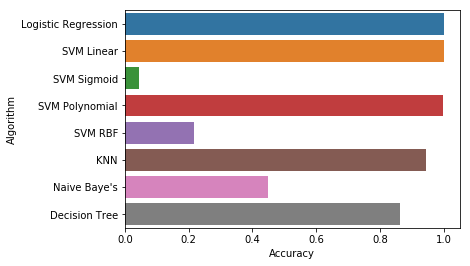

In [47]:
sns.barplot(x = df2.Accuracy, y = df2.Algorithm)

### Observation:
Logistic Regression, Linear SVM, Polynomial SVM gave the highest accuracies with respect to other machine learning classifier models. 